# World happiness data - prediction of hapiness score of the country

import the required libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import the data file

In [86]:
df=pd.read_csv("happy.csv")

In [4]:
df.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


rename the columns

In [87]:
df = df.rename(columns={'Happiness Rank':'rank','Happiness Score':'score','Standard Error':'error','Economy (GDP per Capita)': 'GDP_economy', 'Health (Life Expectancy)': 'health','Trust (Government Corruption)':'corruption','Dystopia Residual':'Dystopia_Residual'}) 
df.head(2)

,Country,Region,rank,score,error,GDP_economy,Family,health,Freedom,corruption,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


data understanding

In [6]:
df.shape

(158, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            158 non-null    object 
 1   Region             158 non-null    object 
 2   rank               158 non-null    int64  
 3   score              158 non-null    float64
 4   error              158 non-null    float64
 5   GDP_economy        158 non-null    float64
 6   Family             158 non-null    float64
 7   health             158 non-null    float64
 8   Freedom            158 non-null    float64
 9   corruption         158 non-null    float64
 10  Generosity         158 non-null    float64
 11  Dystopia_Residual  158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [8]:
df.nunique()

Country              158
Region                10
rank                 157
score                157
error                153
GDP_economy          158
Family               158
health               157
Freedom              158
corruption           157
Generosity           158
Dystopia_Residual    158
dtype: int64

In [9]:
df['Region'].unique().sum()

'Western EuropeNorth AmericaAustralia and New ZealandMiddle East and Northern AfricaLatin America and CaribbeanSoutheastern AsiaCentral and Eastern EuropeEastern AsiaSub-Saharan AfricaSouthern Asia'

In [10]:
df.describe()

,rank,score,error,GDP_economy,Family,health,Freedom,corruption,Generosity,Dystopia_Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


1. we observe that the count is same , i.e no missing values
2. the min and max values found in the the data column is showed 
3. according to the percentile values,expect corruption data ( with right skewd data ) and others are normal 
3. there is no much peesense of outliers in the data to be handles

understanding the data distribution

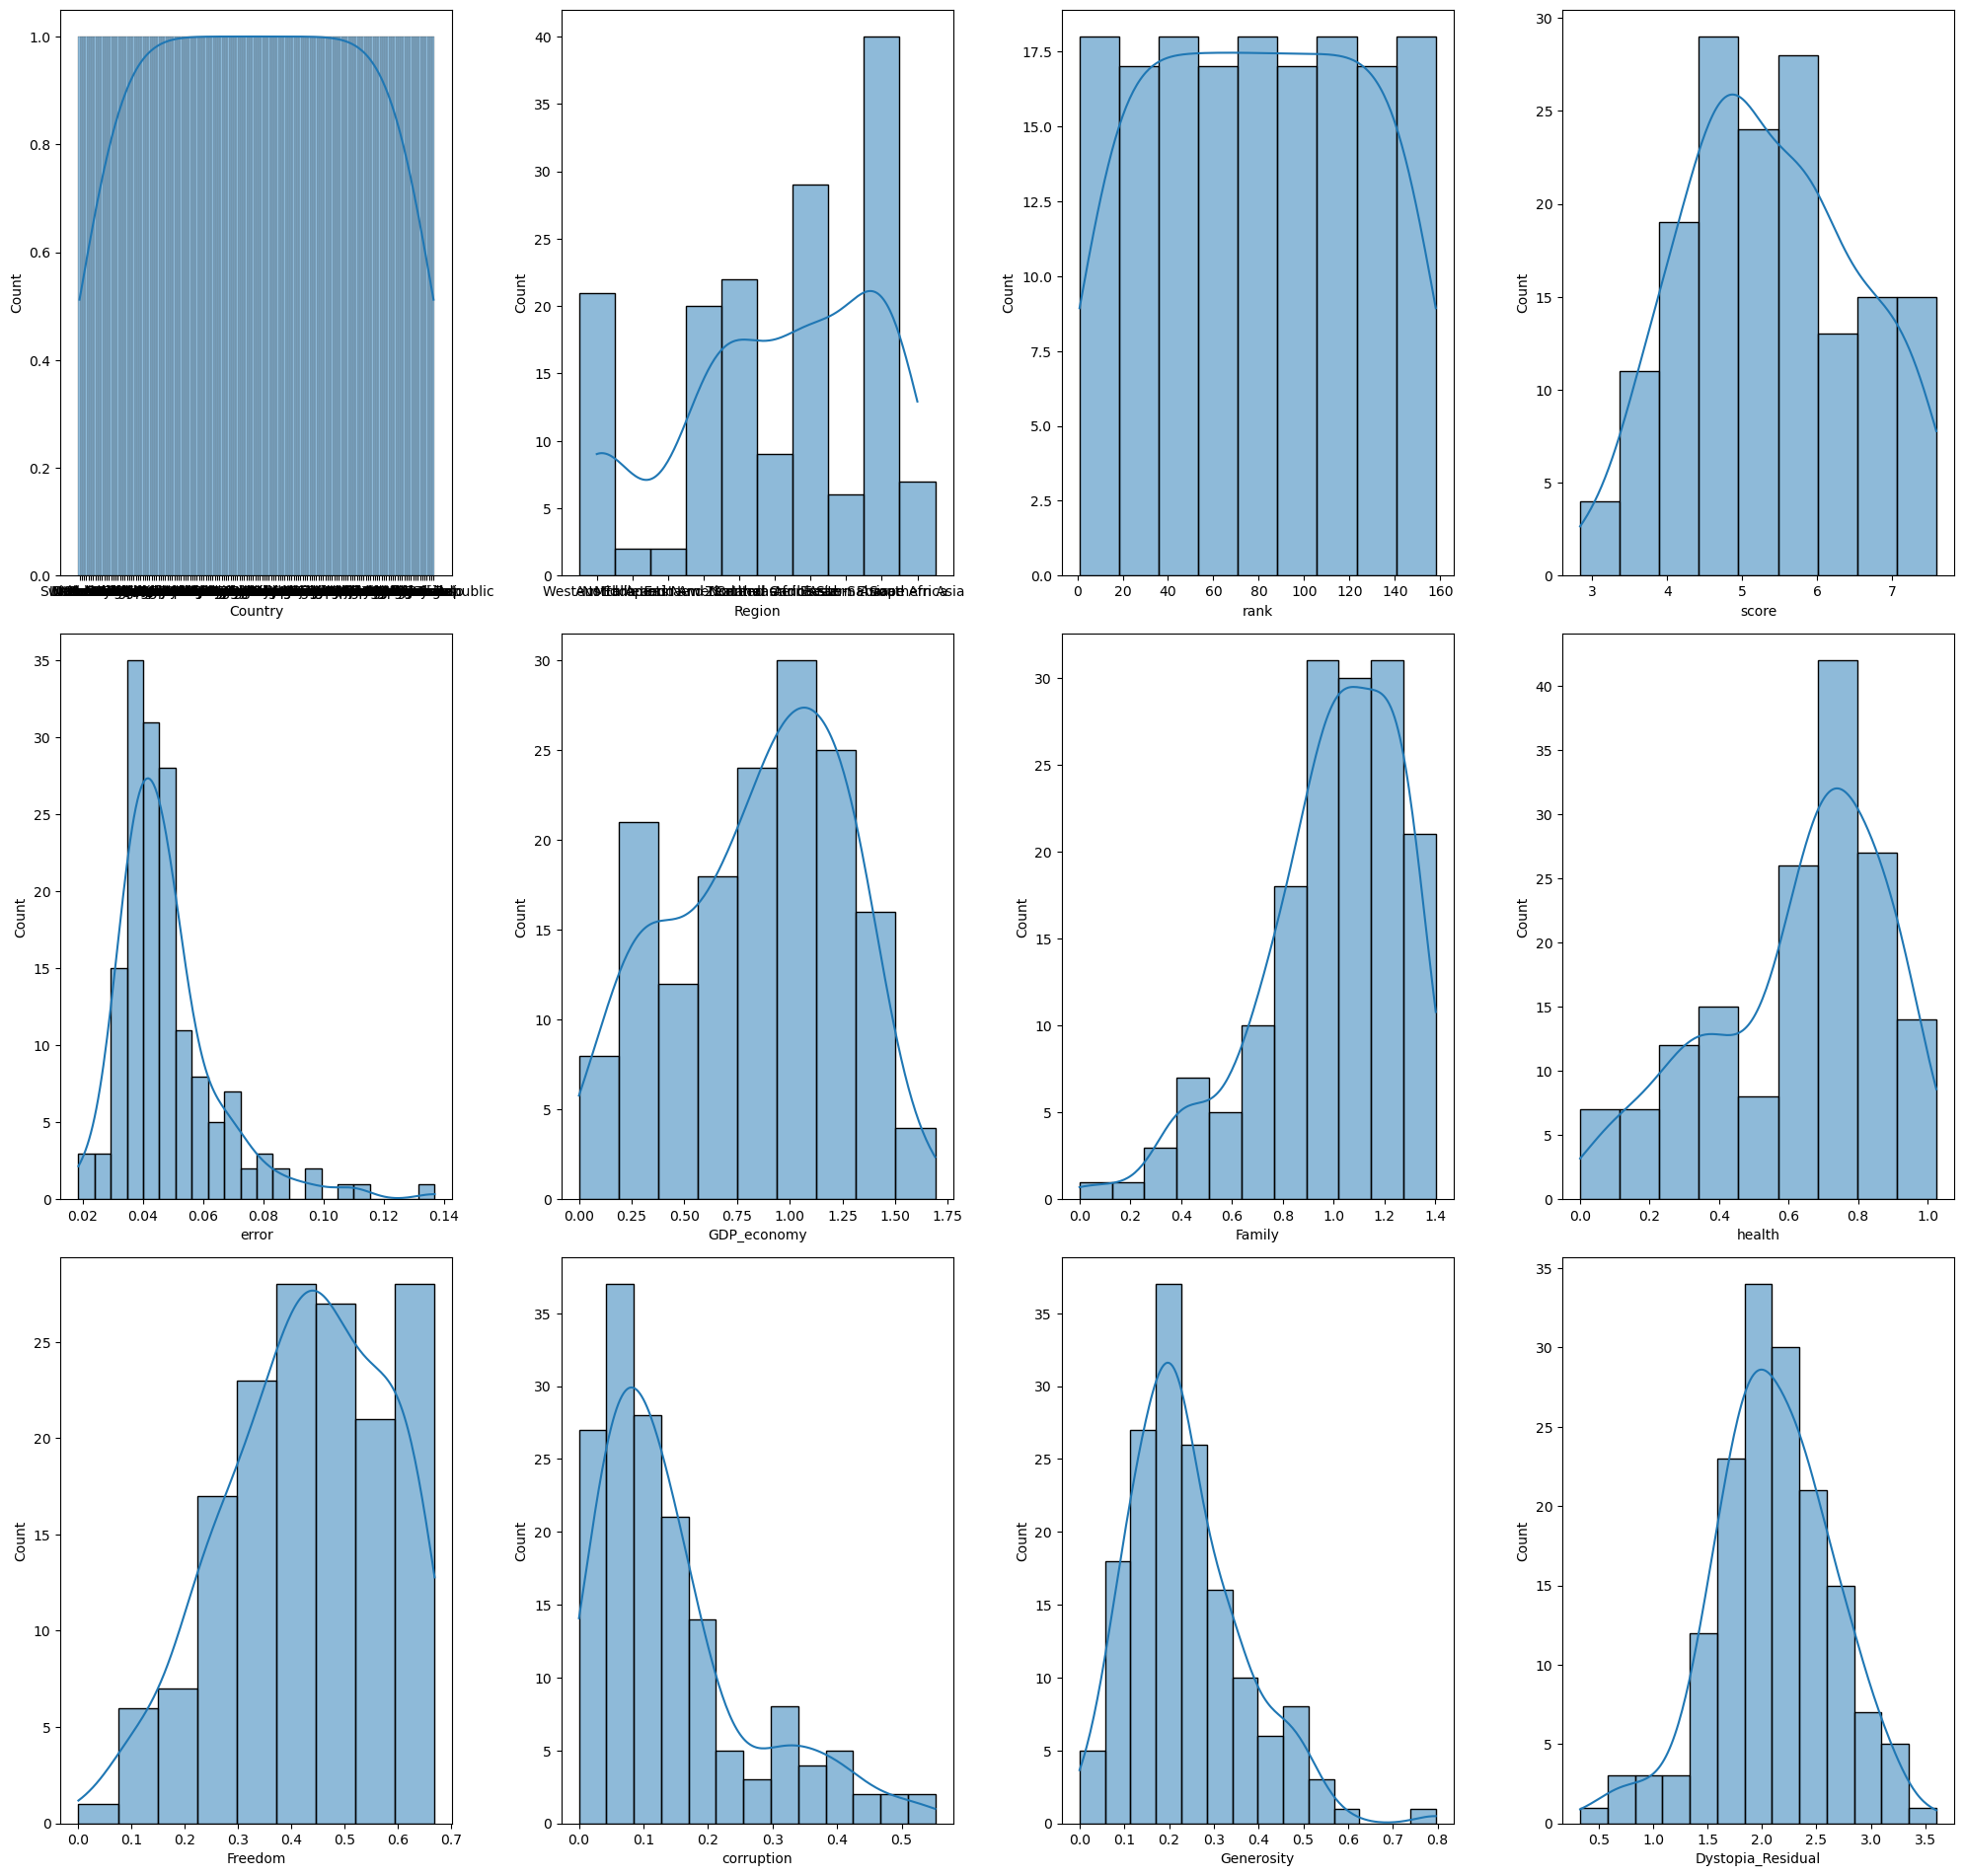

In [11]:
plt.figure(figsize=(20, 25))
pltno = 1
for i in df.columns:
    if pltno <= 16:
        ax = plt.subplot(4, 4, pltno)
        sns.histplot(df[i], kde=True)
        plt.xlabel(i)  
    pltno += 1
plt.tight_layout()
plt.show()

data visualization

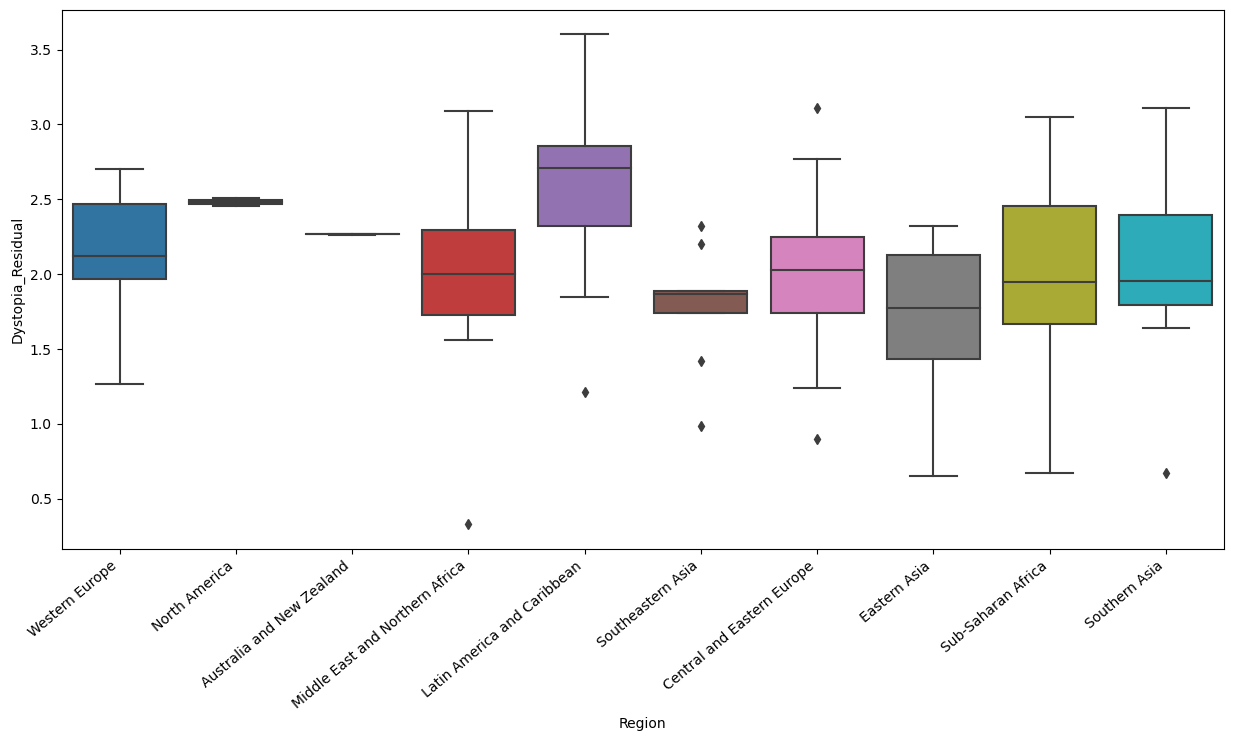

In [88]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Region',y='Dystopia_Residual',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

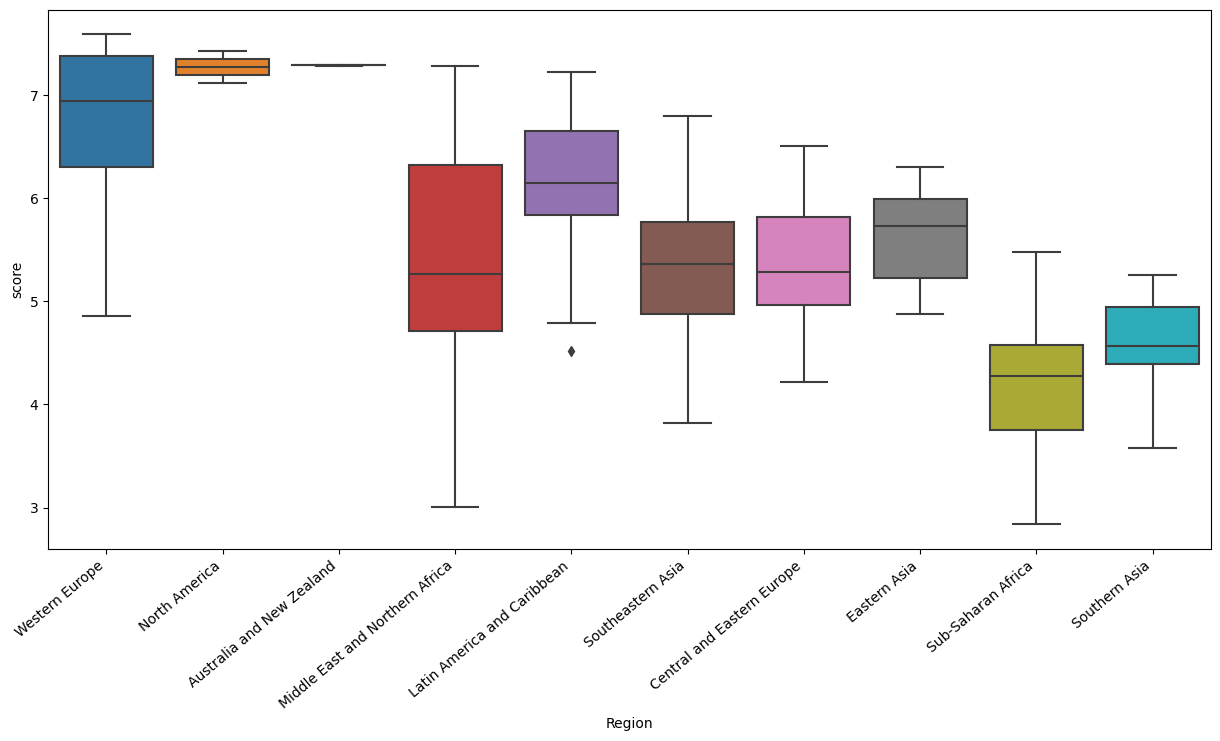

In [89]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Region',y='score',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

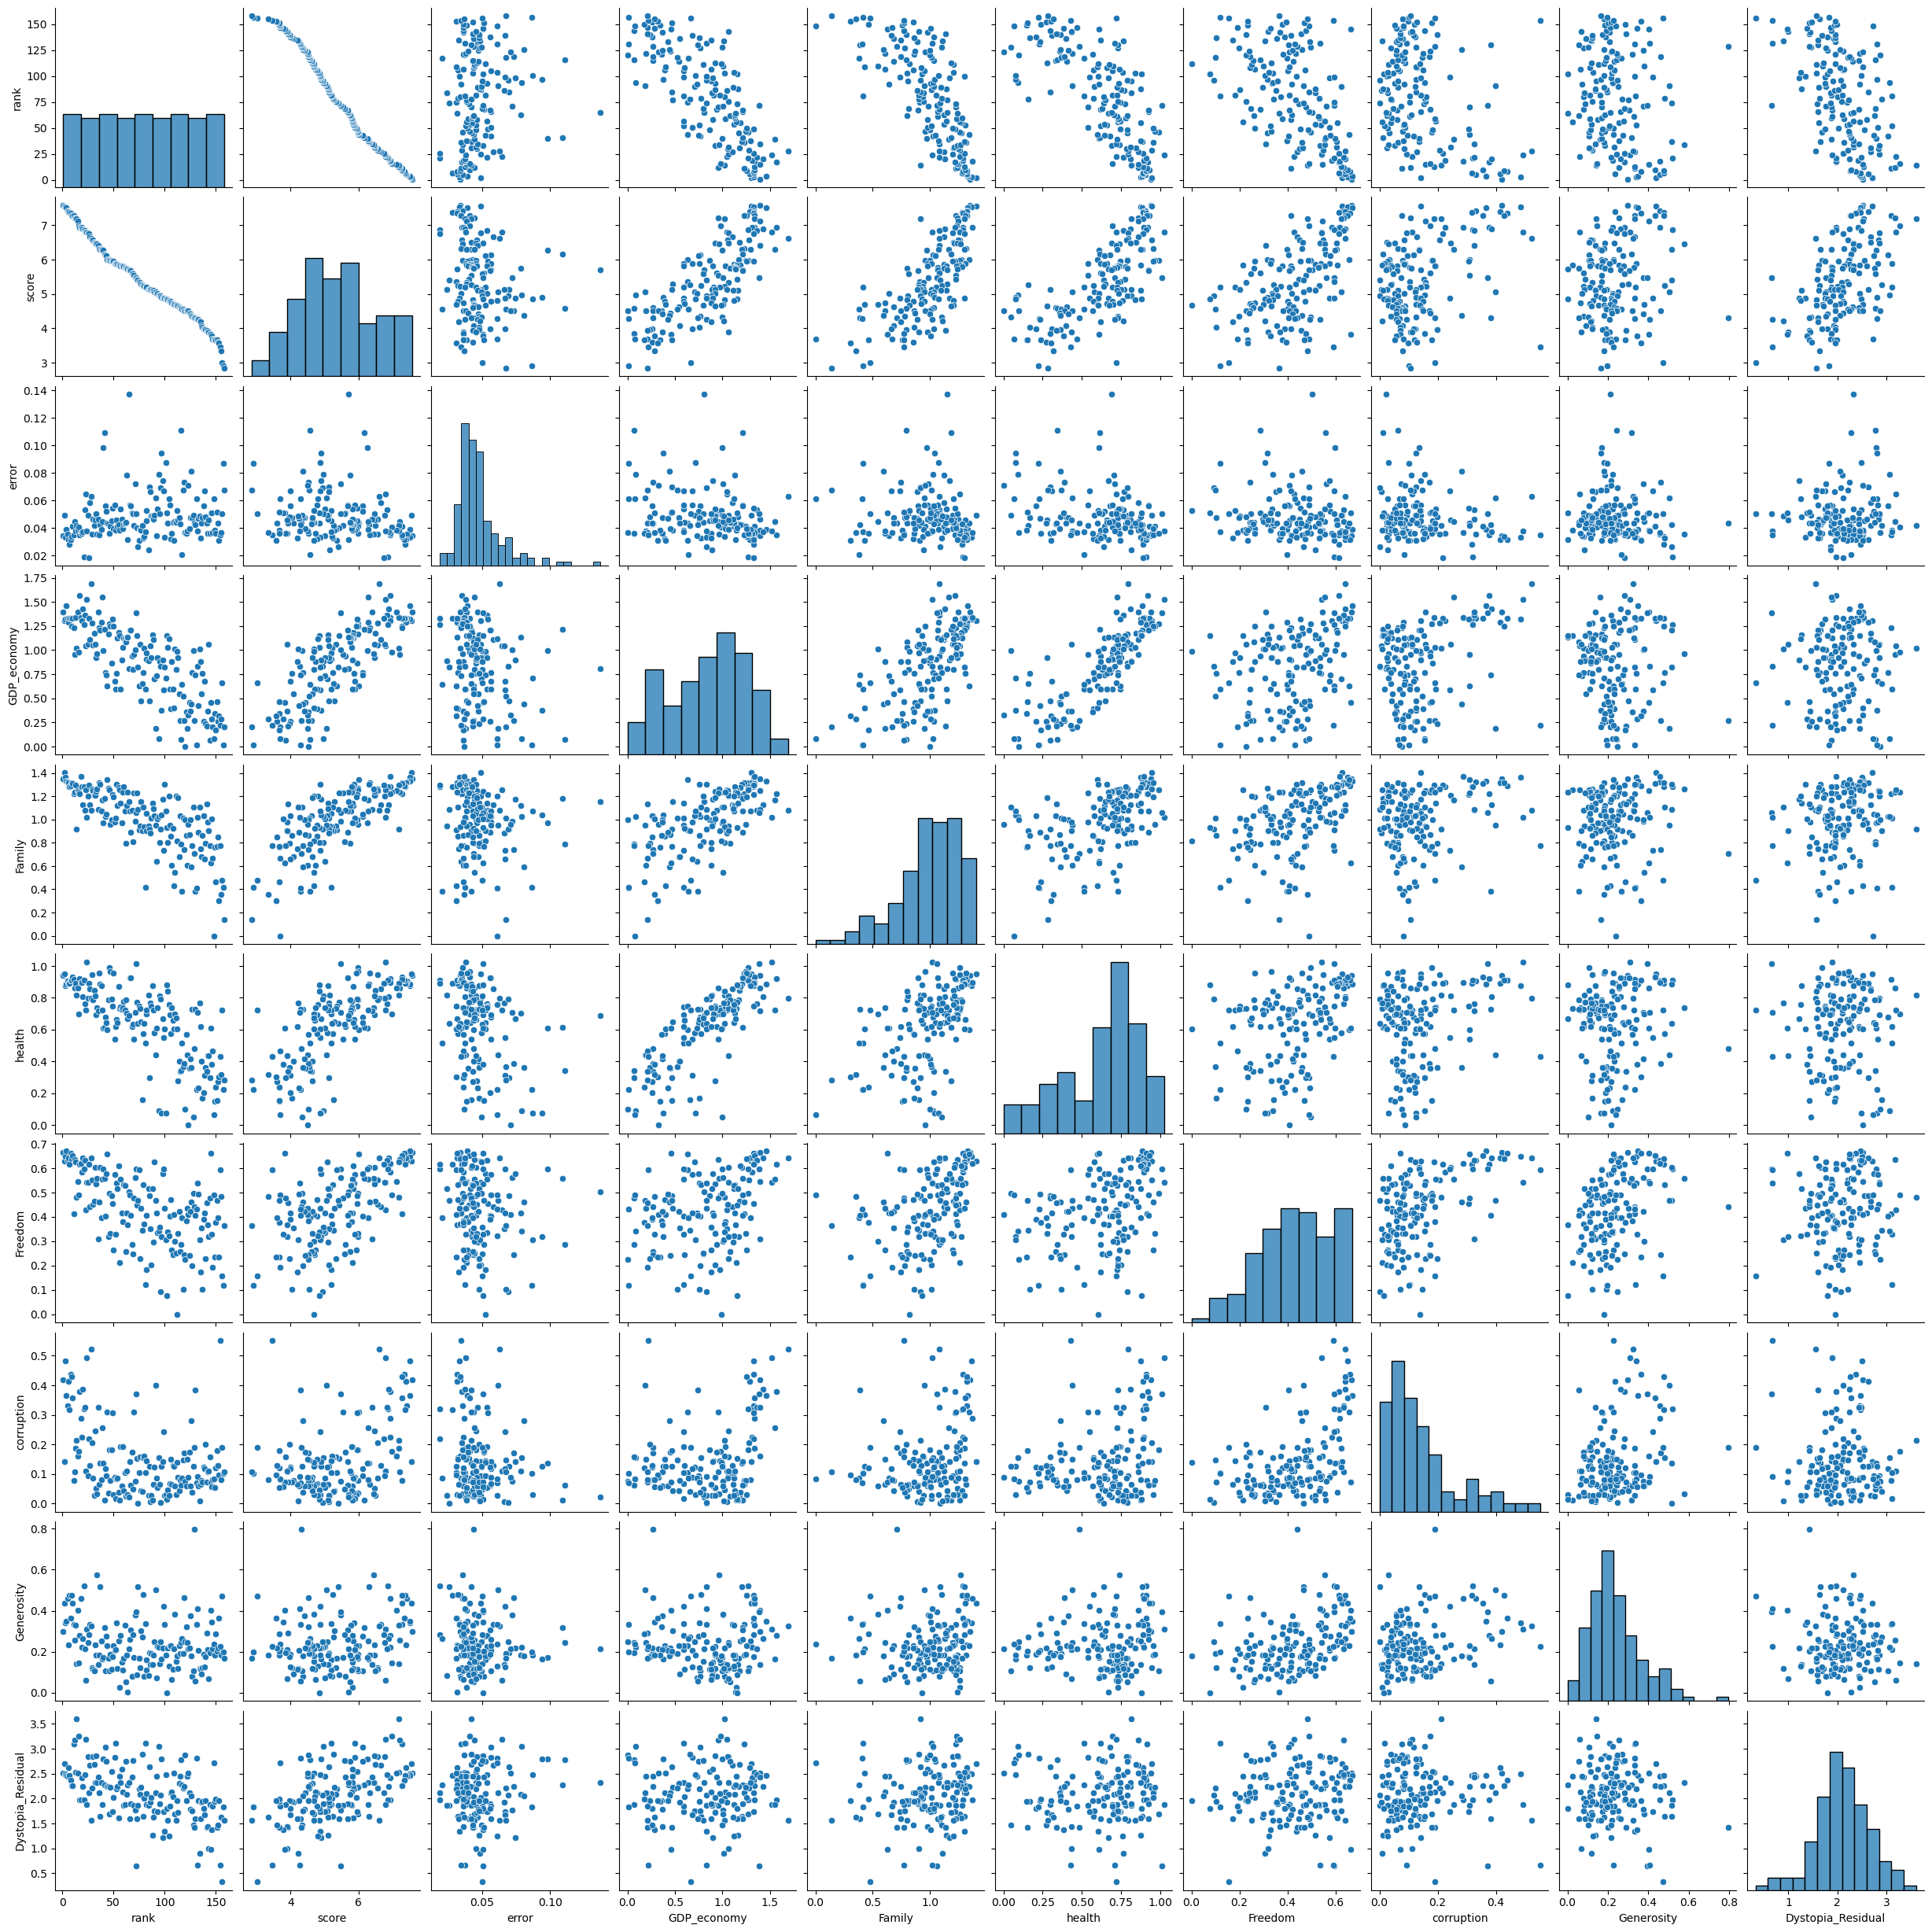

In [107]:
sns.pairplot(data=df)
plt.show()

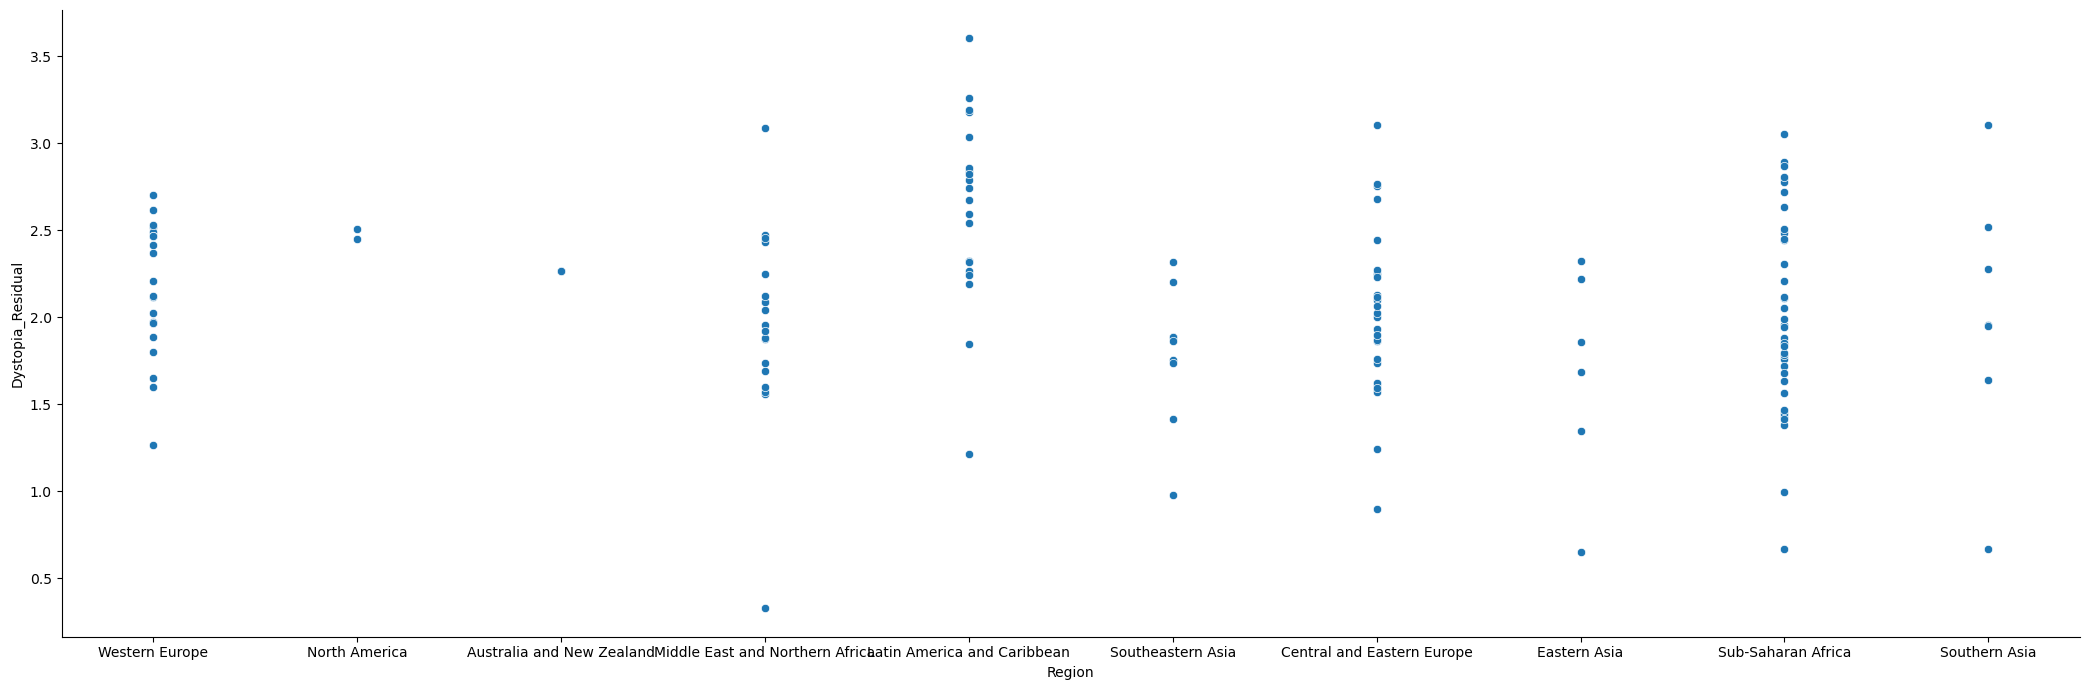

In [108]:
sns.relplot(x='Region',y='Dystopia_Residual',data=df,height=7,aspect=3)

<Axes: xlabel='rank', ylabel='Country'>

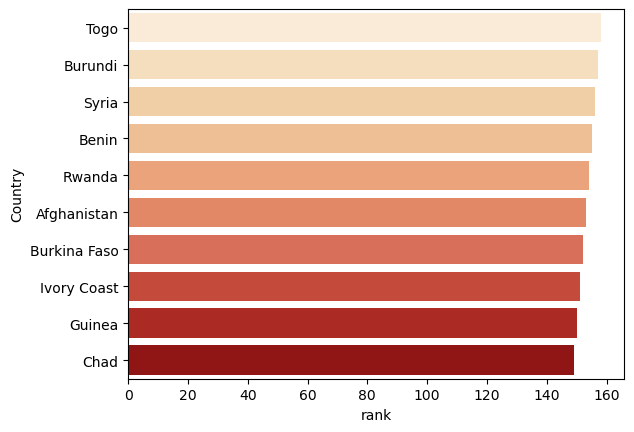

In [91]:
sns.barplot(x='rank',y='Country',data=df.nlargest(10 ,'rank'),palette='OrRd')

<Axes: xlabel='Freedom', ylabel='Country'>

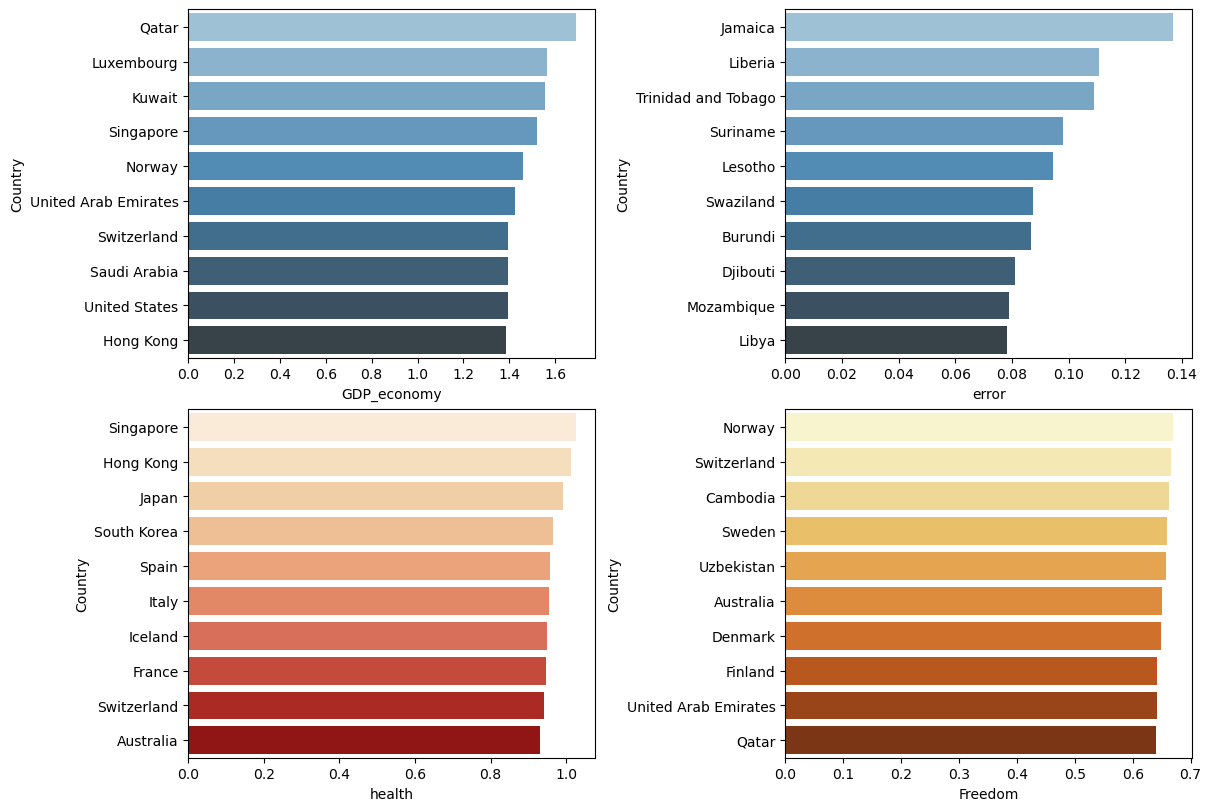

In [92]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))
sns.barplot(x='GDP_economy',y='Country',data=df.nlargest(10,'GDP_economy'),ax=axes[0,0],palette="Blues_d")

sns.barplot(x='error' ,y='Country',data=df.nlargest(10,'error'),ax=axes[0,1],palette="Blues_d")

sns.barplot(x='health' ,y='Country',data=df.nlargest(10,'health'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='Freedom' ,y='Country',data=df.nlargest(10,'Freedom'),ax=axes[1,1],palette='YlOrBr')

<Axes: xlabel='Family', ylabel='score'>

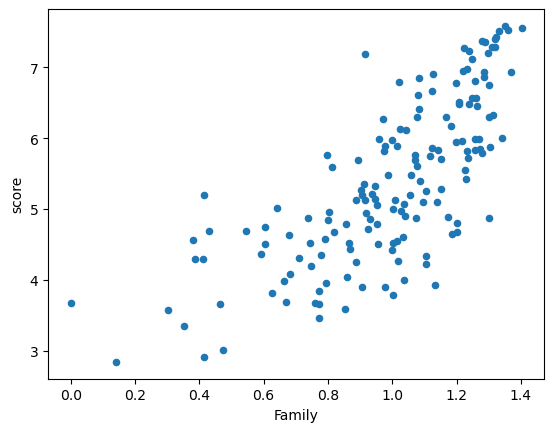

In [93]:
df.plot.scatter(x= 'Family', y='score')

<Axes: xlabel='Freedom', ylabel='score'>

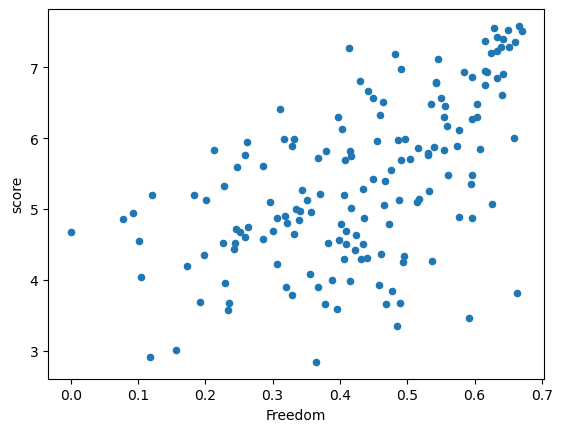

In [103]:
df.plot.scatter(x= 'Freedom', y='score')

<Axes: xlabel='corruption', ylabel='score'>

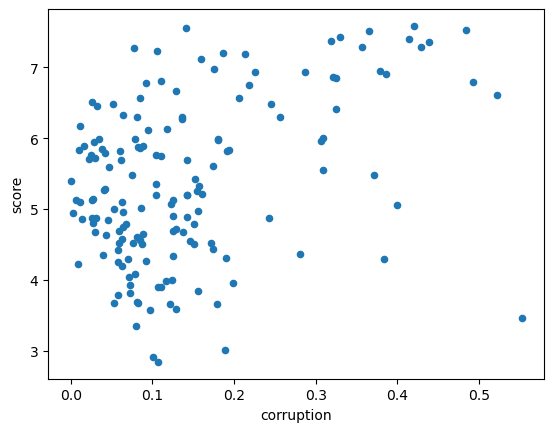

In [104]:
df.plot.scatter(x= 'corruption', y='score')

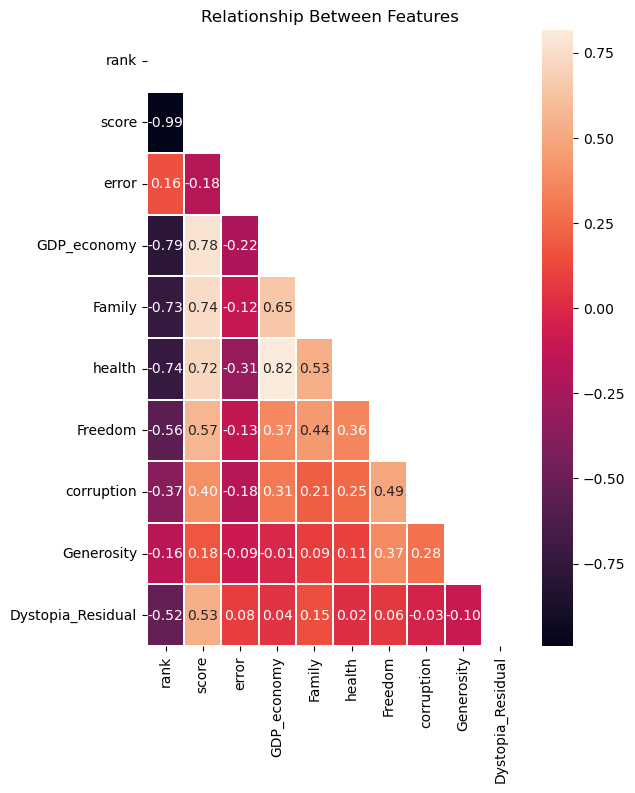

In [94]:
plt.figure(figsize=(6,8))
sub=np.triu(df.drop(["Country","Region"],axis=1).corr())
sns.heatmap(df.drop(["Country","Region"],axis=1).corr(), annot = True, fmt = ".2f", linewidth = .1,mask=sub)
plt.title("Relationship Between Features ")
plt.show()


In [95]:
df_area=df.groupby(["Country","Region"]).size().unstack().sum()
df_area.head(100)

Region
Australia and New Zealand           2.0
Central and Eastern Europe         29.0
Eastern Asia                        6.0
Latin America and Caribbean        22.0
Middle East and Northern Africa    20.0
North America                       2.0
Southeastern Asia                   9.0
Southern Asia                       7.0
Sub-Saharan Africa                 40.0
Western Europe                     21.0
dtype: float64

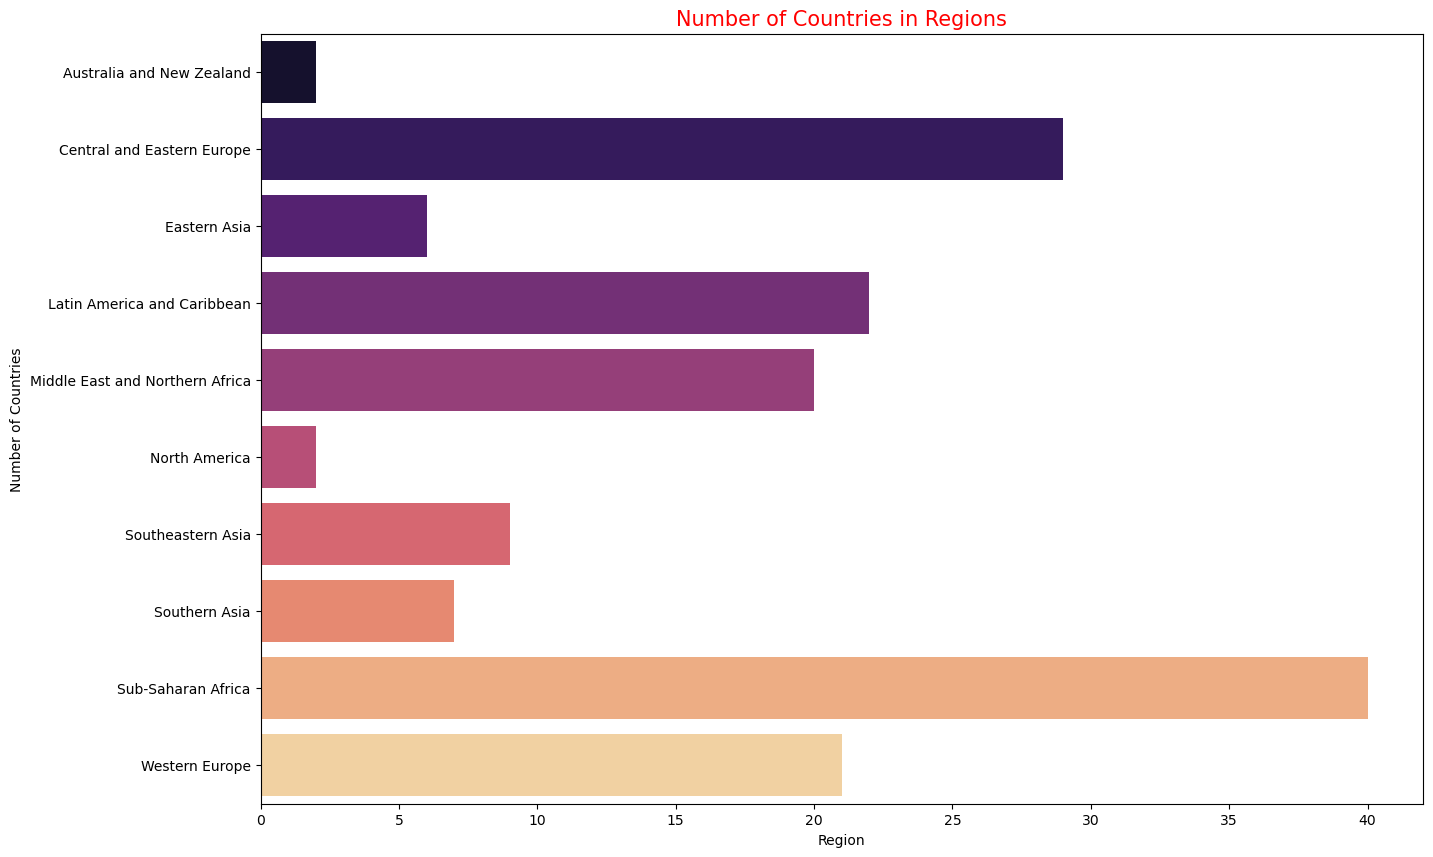

In [96]:
plt.figure(figsize=(15,10))
sns.barplot(x=df_area.values,y=df_area.index,palette="magma")
plt.ylabel("Number of Countries")
plt.xlabel("Region")
plt.title('Number of Countries in Regions',color = 'red',fontsize=15)
plt.show()

In [97]:
df["Region"].value_counts().reset_index()

,Region,count
0,Sub-Saharan Africa,40
1,Central and Eastern Europe,29
2,Latin America and Caribbean,22
3,Western Europe,21
4,Middle East and Northern Africa,20
5,Southeastern Asia,9
6,Southern Asia,7
7,Eastern Asia,6
8,North America,2
9,Australia and New Zealand,2


In [ ]:
df.head(1)

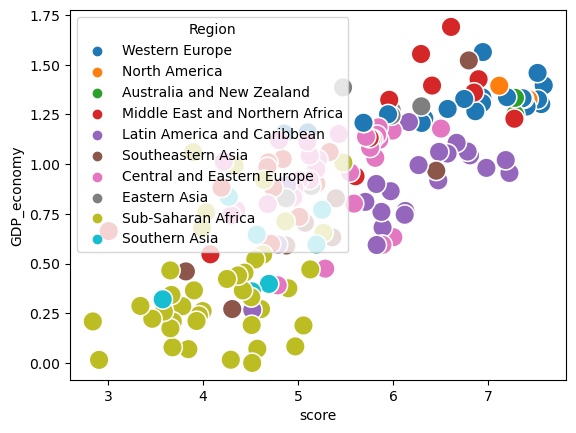

In [98]:
sns.scatterplot(x=df['score'], y=df['GDP_economy'], hue=df['Region'], s=200)
plt.show()

sub-saharan has very less economy with less happiness score where as 
western europe and america has more happiness score

In [99]:
eco_reg=df.groupby('Region')['GDP_economy'].sum()
eco_reg

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: GDP_economy, dtype: float64

Text(0.5, 1.0, 'Economy by Region')

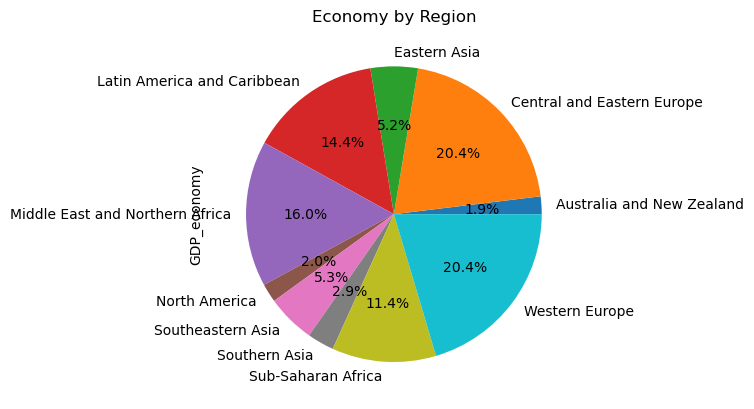

In [100]:
eco_reg.plot.pie(autopct='%1.1f%%')
plt.title('Economy by Region')

In [101]:
# total country 
cntry=df.groupby('Region')[['Country']].count()
cntry

,Country
Region,
Australia and New Zealand,2
Central and Eastern Europe,29
Eastern Asia,6
Latin America and Caribbean,22
Middle East and Northern Africa,20
North America,2
Southeastern Asia,9
Southern Asia,7
Sub-Saharan Africa,40


Correlation

In [13]:
col = df.select_dtypes(include=['float64', 'int64'])
cor_mat = col.corr()
cor_mat

,rank,score,error,GDP_economy,Family,health,Freedom,corruption,Generosity,Dystopia_Residual
rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
GDP_economy,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
health,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
corruption,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia_Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<Axes: >

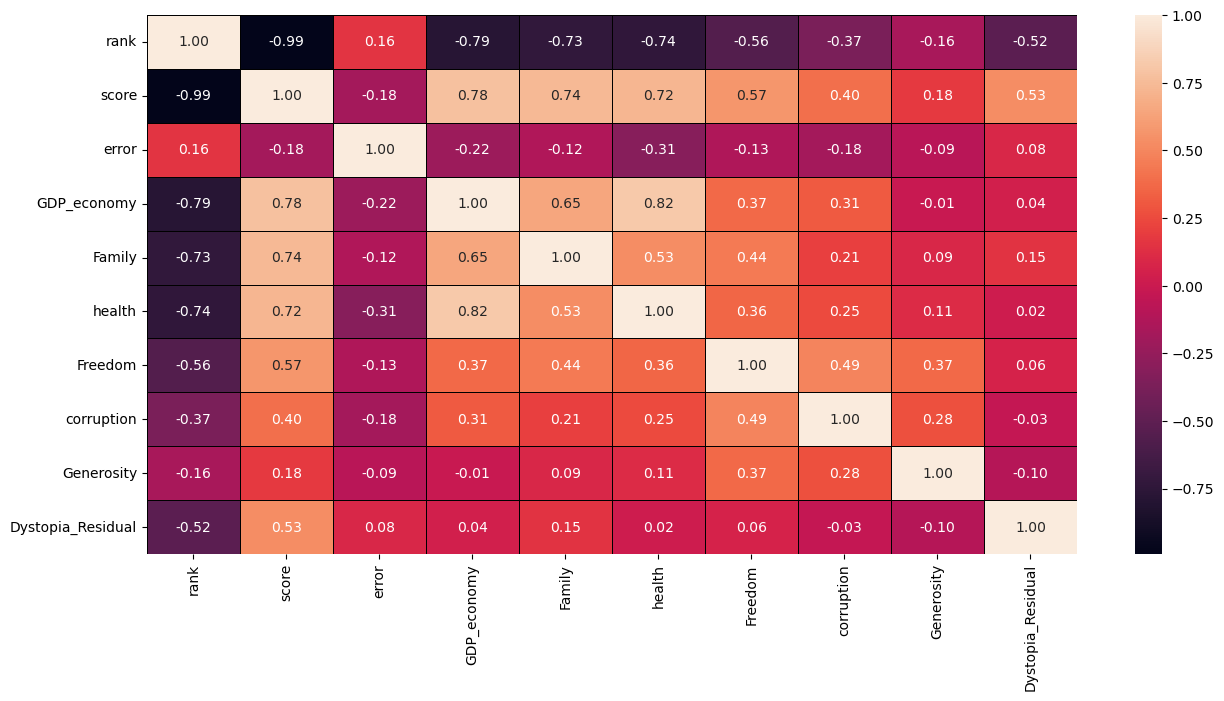

In [14]:
plt.figure(figsize =(15,7))
sns.heatmap(col.corr(),annot = True ,linewidths = 0.5,linecolor = 'black' , fmt = '.2f')


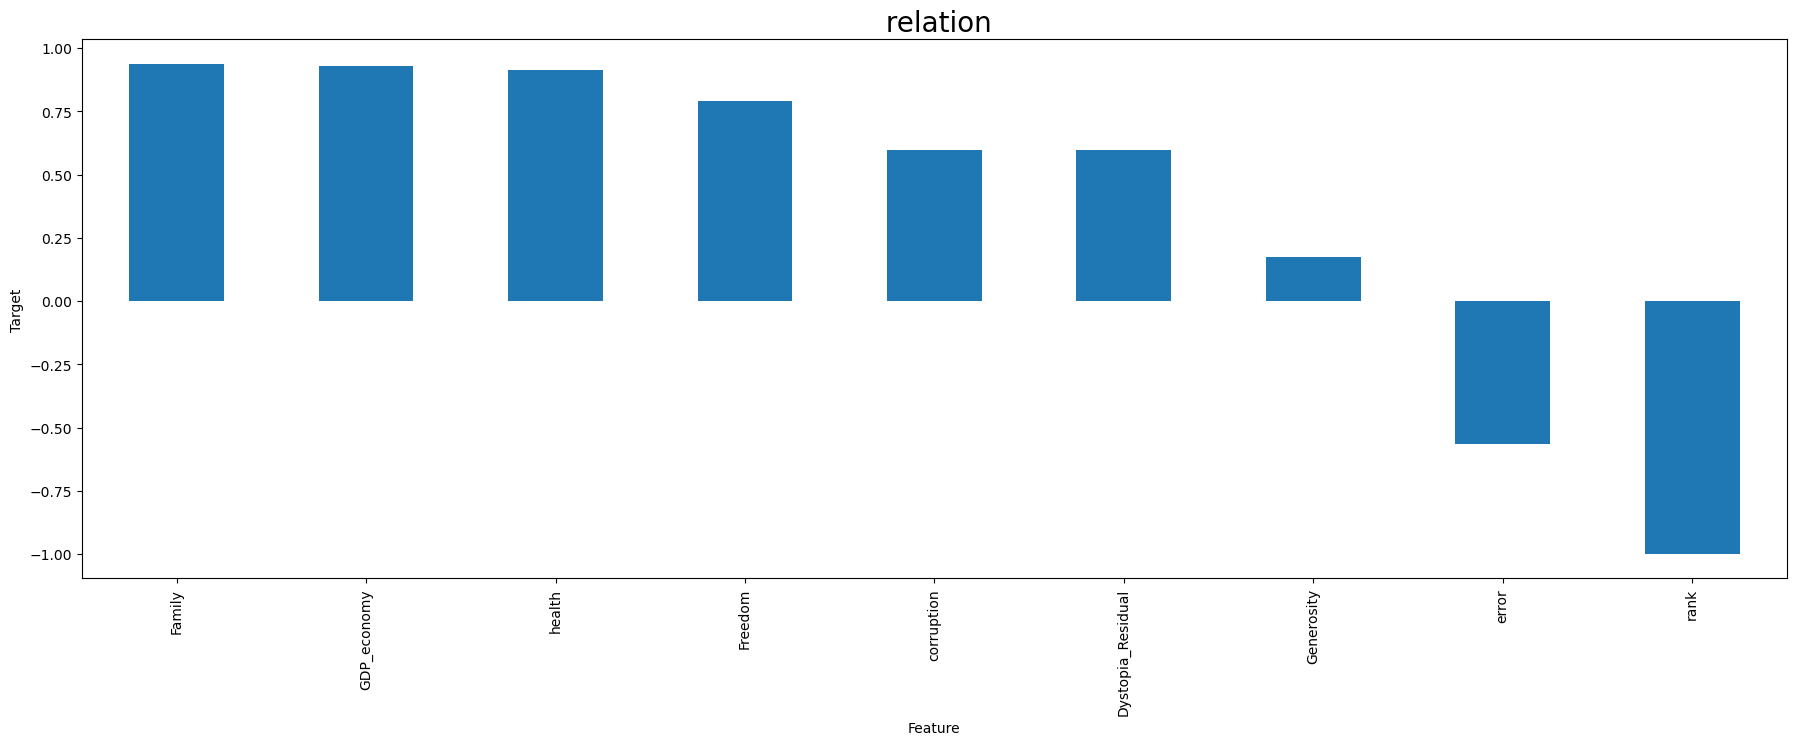

In [15]:
plt.figure(figsize=(22,7))
cor_mat.corr()['score'].sort_values(ascending=False).drop(['score']).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title(" relation",fontsize=20)
plt.show()

skew check

In [26]:
dfs=df.drop(['Country','Region'],axis=1)

In [27]:
dfs.skew()

rank                 0.000418
score                0.097769
error                1.983439
GDP_economy         -0.317575
Family              -1.006893
health              -0.705328
Freedom             -0.413462
corruption           1.385463
Generosity           1.001961
Dystopia_Residual   -0.238911
dtype: float64

<Axes: xlabel='score', ylabel='Density'>

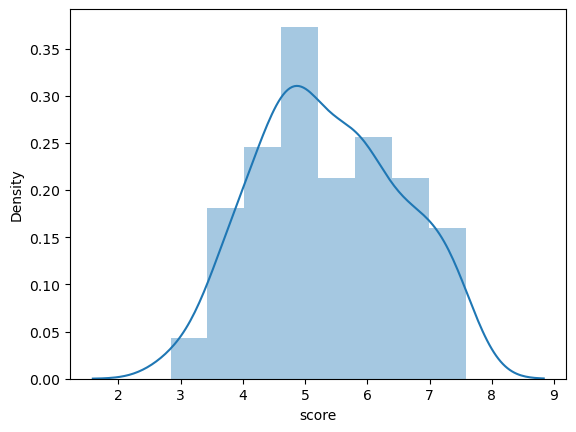

In [28]:
sns.distplot(df['score'])

MACHINE LEARNING

In [55]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier,RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error, r2_score, classification_report, confusion_matrix, roc_curve

from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

check the VIF

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif[" VIF val"]= [variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
vif["Feature"]=X.columns
vif

,VIF val,Feature
0,2.934653,rank
1,21.769501,GDP_economy
2,25.144018,Family
3,21.816293,health
4,11.098695,Freedom
5,10.705172,Dystopia_Residual


In [17]:
data=df.drop(['Country','Region','error','corruption','Generosity'],axis=1)

In [19]:
df.head(1)

,Country,Region,rank,score,error,GDP_economy,Family,health,Freedom,corruption,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


In [39]:
data.head(1)

,rank,score,GDP_economy,Family,health,Freedom,Dystopia_Residual
0,1,7.587,1.39651,1.34951,0.94143,0.66557,2.51738


In [38]:
X = data.drop('score', axis=1)
y = data['score']

In [30]:
X.head(1)

,rank,GDP_economy,Family,health,Freedom,Dystopia_Residual
0,1,1.39651,1.34951,0.94143,0.66557,2.51738


In [31]:
y.head(1)

0    7.587
Name: score, dtype: float64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [40]:
scaler = StandardScaler().fit(X_train) 
S_X_train = scaler.transform(X_train) 
S_X_test = scaler.transform(X_test) 

In [44]:
maxacc=0
maxrs=0
for i in range(1,200):
    S_X_train,S_X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=i  )
    lr=LinearRegression()
    lr.fit(S_X_train,y_train)
    pred=lr.predict(S_X_test)
    acc=r2_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print(" max r2 score : ",maxacc," on random state ", maxrs)



 max r2 score :  0.9921850814988888  on random state  182


In [62]:
model={'dt':DecisionTreeRegressor(),'rf':RandomForestRegressor(),'lR': LinearRegression(),
       'svr': SVR(),'knn':KNeighborsRegressor(),'rid':Ridge(),'ls':Lasso(),'gb':GradientBoostingRegressor(),}     
print(model)


{'dt': DecisionTreeRegressor(), 'rf': RandomForestRegressor(), 'lR': LinearRegression(), 'svr': SVR(), 'knn': KNeighborsRegressor(), 'rid': Ridge(), 'ls': Lasso(), 'gb': GradientBoostingRegressor()}


In [64]:

y_preds = {}
for key, value in model.items():
    value.fit(S_X_train, y_train)
    y_pred = value.predict(S_X_test)
    y_preds[key] = y_pred
y_pred

array([5.12308801, 3.03146559, 5.19181194, 5.01617994, 3.71556137,
       6.57028803, 7.20302046, 4.85784217, 5.88196089, 5.88279843,
       3.90201815, 4.79891656, 6.48991396, 7.54515224, 5.06230685,
       4.51712279, 5.12253645, 5.691218  , 4.89957856, 6.86481236,
       5.75335204, 3.99697693, 6.44539421, 5.213907  , 5.26536884,
       4.2854337 , 5.75409837, 5.81284617, 4.61024323, 5.84740512,
       5.81052597, 4.68409748, 3.95565418, 4.36322138, 5.97696337,
       4.34096525, 6.16856571, 4.90026107, 4.87678412, 3.58765311,
       5.99600964, 4.67377003, 6.29758246, 3.66855643, 5.0163146 ,
       5.96405541, 5.12228652, 6.81254376])

In [65]:
value.score(S_X_train,y_train)

0.9999981930021785

In [66]:
value.score(S_X_test,y_test)

0.9981961694654852

In [68]:
mae = {}
mse = {}
r2 = {}
rmse = {}

for key, value in model.items():
    y_pred = value.predict(X_test)
    
    mae[key] = mean_absolute_error(y_test, y_pred)
    mse[key] = mean_squared_error(y_test, y_pred)
    r2[key] = r2_score(y_test, y_pred)
    rmse[key] = np.sqrt(mse[key])

details = pd.DataFrame({
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2,
})

print("\nDetails for each model:")
print(details)



Details for each model:
          MAE       MSE      RMSE        R2
dt   0.055562  0.009203  0.095934  0.990804
rf   0.031159  0.003833  0.061915  0.996170
lR   0.105346  0.018360  0.135497  0.981655
svr  0.070889  0.015698  0.125294  0.984314
knn  0.030833  0.004480  0.066929  0.995524
rid  0.102686  0.017233  0.131275  0.982781
ls   0.103665  0.019983  0.141362  0.980033
gb   0.026583  0.001805  0.042489  0.998196


In [69]:
best_model = details['MSE'].idxmin()

print(f"The best model based on MSE is: {best_model}")

The best model based on MSE is: gb


In [73]:
final_model = GradientBoostingRegressor()
final_model.fit(S_X_train, y_train)

y_pred = final_model.predict(S_X_test)


In [74]:
import joblib
joblib.dump(final_model,"world_happy")

['world_happy']

In [75]:
prediction=final_model.predict(S_X_test) 
prediction

array([5.12308801, 3.04269521, 5.19181194, 5.01617994, 3.71556137,
       6.57028803, 7.20302046, 4.85810107, 5.88143396, 5.88211212,
       3.90449793, 4.79891656, 6.48991396, 7.54089517, 5.06230685,
       4.51741185, 5.12253645, 5.691218  , 4.89957856, 6.86481236,
       5.75335204, 3.99689454, 6.44539421, 5.2134811 , 5.26577305,
       4.28550921, 5.75409837, 5.81284617, 4.61024323, 5.84740512,
       5.81052597, 4.68445802, 3.95407979, 4.36293286, 5.97696337,
       4.34096525, 6.16856571, 4.90026107, 4.87678412, 3.58560404,
       5.99600964, 4.67555867, 6.29758246, 3.66855643, 5.0163146 ,
       5.96405541, 5.12228652, 6.81254376])

In [76]:
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df


,Predicted,Original
0,5.123088,5.129
1,3.042695,2.839
2,5.191812,5.140
3,5.016180,4.971
4,3.715561,3.681
5,6.570288,6.505
6,7.203020,7.187
7,4.858101,4.867
8,5.881434,5.889
9,5.882112,5.878


In [80]:
data.head(1)

,rank,score,GDP_economy,Family,health,Freedom,Dystopia_Residual
0,1,7.587,1.39651,1.34951,0.94143,0.66557,2.51738


In [81]:
print('SCORE ',model['gb'].predict(scaler.transform([[1,1.39651,1.34951,0.94143,0.66557,2.51738,]])))

SCORE  [7.57423561]
